## Grafo das Cidades a serem Visitadas

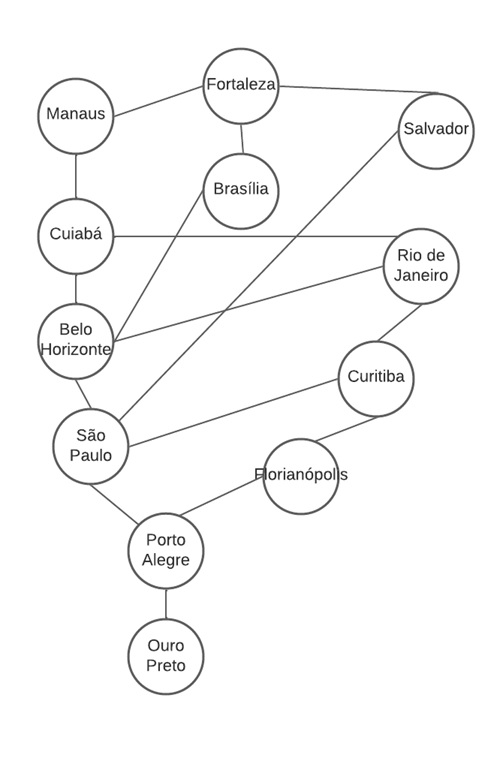

In [85]:
# Grafo das Cidades

grafo = {
  "Manaus" : ["Fortaleza", "Cuiabá"],
  "Cuiabá" : ["Manaus", "Belo Horizonte", "Rio de Janeiro"],
  "Fortaleza" : ["Manaus", "Brasília", "Salvador"],
  "Salvador" : ["Fortaleza", "Sao Paulo"],
  "Brasília" : ["Fortaleza", "Belo Horizonte"],
  "Belo Horizonte" : ["Cuiabá", "Rio de Janeiro", "Sao Paulo", "Brasília"],
  "Rio de Janeiro" : ["Belo Horizonte", "Cuiabá", "Curitiba"],
  "Sao Paulo" : ["Belo Horizonte", "Curitiba", "Porto Alegre", "Salvador"],
  "Curitiba" : ["Sao Paulo", "Rio de Janeiro", "Florianópolis"],
  "Florianópolis" : ["Curitiba", "Porto Alegre"],
  "Porto Alegre" : ["Sao Paulo", "Florianópolis", "Ouro Preto"],
  "Ouro Preto": ["Porto Alegre"]
  
}

###Função mostrar_caminho

Essa função recebe:

um caminho -> dicionário que contem um vértice e o seu pai, sendo o pai de um 
              vértice, o vértice que visita o filho através de uma busca.


no_inicial -> é o nome do nó que de onde a busca irá partir

no_destino -> é o nome do nó que a busca quer alcançar.

no_meio-> é o nome do nó que está no centra das duas buscas, ou seja
          o nó que fez a interseção entre as buscas.

E a partir desses parâmetros, retorna o caminho resultante da busca bidirecional do nó inicial até o nó final.






In [84]:
def mostrar_caminho(caminho, no_inicial, no_destino, no_meio):

  # Lista que irá conter o caminho do nó inicial até o nó intermediário
  caminhagem_inicial = [] 

  # Inicialmente o nó central é o nó da interseção das buscas
  no_central = no_meio 

  # Ele é adicionado ao caminho que parte do nó inicial
  caminhagem_inicial.append(no_central)

  # E o nó que chegou até o nó central a através do nó inicial
  # vira o novo nó central
  no_central = caminho[no_central][0]

  # Enquanto tiver um pai do no atual(central)
  while no_central:
    # É adicionado esse nó no caminho inicial
    caminhagem_inicial.append(no_central)

    # E o novo nó central é o pai do nó central anterior
    no_central = caminho[no_central]
  # Esse processo é feito até chegar no nó inicial

  # Então o caminho do nó inicial até o nó central 
  # é o inverso do caminho caminhado
  caminhagem_inicial = caminhagem_inicial[::-1]


  # O mesmo processo se repete para do nó central até o nó objetivo(final)
  caminhagem_final = []

  no_central = no_meio

  # O nó que chegou até o nó central a através do nó final
  # vira o novo nó central
  caminhagem_final.append(no_central)
  no_central = caminho[no_central][1]


  while no_central:
    caminhagem_final.append(no_central)
    no_central = caminho[no_central]
  # No entanto não é necessário inverter o caminho até o nó final 

  # E é retornado o camaminho total
  # Que é o caminho do nó inicial até o nó do meio
  # Mais o caminho do nó do meio até o nó final
  return caminhagem_inicial + caminhagem_final

###Função new_fronteira

Essa função recebe:

grafo -> grafo representado por um dicionário

nos_visitados -> dicionário que representa os nós visitados, onde
                
                0 - nó não visitado
                1 - nó visitado pela fronteira 1
                2 - nó visitado pela fronteira 2

fronteira -> uma lista que representa a fronteira a ser trabalhada.

tipo -> é o tipo da fronteira que irá expandir a sua fronteira

                1 - Fronteira 1 (Parte do nó inicial)
                2 - Fronteira 2 (Parte do nó final(objetivo))

um caminho -> dicionário que contem um vértice e o seu pai, sendo o pai de um vértice, o vértice que visita o filho através de uma busca.


E a partir desses parâmetros:

    -> gera a busca em largura através de uma fronteira de qualquer tipo
    -> marca os vértices visitados como visitado pela fronteira de tipo i
    -> identifica se um vértice visitado por uma fronteira está sendo visitado por outra, nesse caso houve um interseção e a busca pode ser interrompida.
    -> Se houve interseção retorna o vértice do meio (interseptado) e True para interromper a busca
    -> Se não houver, retorna a nova fronteira daquele tipo e False para interromper a busca


In [83]:
def new_fronteira(grafo, nos_visitados, fronteira, tipo, caminho):
  """
    Essa funcao gera a busca em largura, retorna a nova fronteira
    marcando os vertices como visitados, e retorna também se as fronteira se encontraram
  """

  #Busca em largura - fronteira

  # Define a nova fronteira
  nova_fronteira = []

  # Para cada vértice da fronteira
  for vertice in fronteira:
    # Percorre cada vértice adjacente
    for adjacente in grafo[vertice]:
      # E se esse nó avaliado (próximo a fronteira)
      # Não tiver sido visitado por nenhuma fronteira
      if nos_visitados[adjacente] == 0:
        # É marcado que o nó foi visitado
        nos_visitados[adjacente] = tipo

        # E o vértice visitado é adicionado na nova fronteira
        nova_fronteira.append(adjacente)

        # E é salvo o vértice pai 
        caminho[adjacente] = vertice
      
      #Se o nó avaliado tiver sido visitado por outra fronteira
      elif nos_visitados[adjacente] != tipo:
        # E se a fronteira que já o visitou for do tipo 2
        if tipo == 1:
          # Então é salvo os vertices da fronteira 1 e 2 que chegaram
          # nesse vértice que as interceptam
          # Sendo sempre na 
          # posição 0 -> o vértice da fronteira 1 que visitou o vértice central
          # posição 1 -> o vértice da fronteira 2 que visitou o vértice central
          caminho[adjacente] = [vertice, caminho[adjacente]]
        else:
          caminho[adjacente] = [caminho[adjacente], vertice]
          
        # Nesse caso a busca deve para e é retornado o vértice central,
        # e que True indicando que a busca deve parar
        return adjacente, True

  # Caso dê tudo certo é removido as repetições da nova fronteira 
  # e a mesma é retornada junto de False indicando que a buscao nao deve parar
  return list(set(nova_fronteira)) , False

  

###Função busca_bidirecional

Essa função recebe:

grafo -> grafo representado por um dicionário

no_inicial -> rótulo do vértice de onde a busca partirá

no_objetivo -> rótulo do vértice objetivo


E a partir desses parâmetros gera duas fronteiras:
    
    fronteira inicial-> que inicia com o vértice inicial e realiza busca em largura
    fronteira final-> que inicia com o vértice final(objetivo) e realiza busca em largura

Enquanto as fronteiras não estiverem vazias é feito uma busca em largura nas duas fronteiras. Em seguida é conferido se existe pelo menos um elemento em comum entre as duas fronteiras.

    Se sim-> É retornado que existe um caminho entre o vértice inicial e o vértice objetivo.
    Caso contrário repete o loop

Se sair do loop significa que não existe caminho entre o vértice inicial e o vértice objetivo



In [76]:
def busca_bidirecional(grafo, no_inicial, no_objetivo):
    # Inicializa todos os nos com 0 -> Não visitados
    nos_visitados = {vertice: 0 for vertice in grafo.keys()}

    # Cria a fronteira inicial contendo somente o nó inicial    
    fronteira_inicial = [no_inicial]
    # Coloca que o nó inicial foi visitado pela fronteira 1 
    nos_visitados[no_inicial] = 1

    # Cria a fronteira inicial contendo somente o nó final(objetivo)
    fronteira_final = [no_objetivo]
    # Coloca que o nó inicial foi visitado pela fronteira 2
    nos_visitados[no_objetivo] = 2

    print("\nIniciando Busca Bidirecional\n\n")
    
    # Cria o dicionário de caminhos onde o nó inicial e final não tem pais
    caminho ={no_inicial: None, no_objetivo: None}

    #Enquanto nao tiver fronteira vazia
    while fronteira_inicial != [] and fronteira_final != []:

      # Imprime-se as fronteira
      print("\n\nFronteira Inicial:  ", fronteira_inicial)
      print("Fronteira Final:  ", fronteira_final)

      # Realiza a expansão da fronteira 1(inicial)
      # conferindo se teve ponto de intersecao entre as fronteiras
      fronteira_inicial, stop = new_fronteira(grafo, nos_visitados, fronteira_inicial, 1, caminho)

      # se stop for True a busca deve parar 
      # e o caminho encontrado é mostrado na tela
      if stop:
        print("Caminho encontrado do no", no_inicial, "até o nó objetivo", no_objetivo)
        print("No da interseção:", fronteira_inicial)
        #print(caminho)
        print("Caminho:", mostrar_caminho(caminho, no_inicial, no_objetivo, fronteira_inicial))
        
        return

      # Realiza a expansão da fronteira 2(final)
      # conferindo se teve ponto de intersecao entre as fronteiras
      fronteira_final, stop = new_fronteira(grafo, nos_visitados, fronteira_final, 2, caminho)

      # se stop for True a busca deve parar 
      # e o caminho encontrado é mostrado na tela
      if stop:
        print("Caminho encontrado do no", no_inicial, "até o nó objetivo", no_objetivo)
        print("No da interseção:", fronteira_final)
        #print(caminho)
        print("Caminho:", mostrar_caminho(caminho, no_inicial, no_objetivo, fronteira_final))
        
        return
      
      
    # Se as fronteira ficarem vazias
    # então o grafo todo foi percorrido 
    # e não foi encontrado interseção entre as fronteira
    # então o caminho é inexistente
    return "Nao Encontrado" 

In [86]:
busca_bidirecional(grafo, "Manaus", "Ouro Preto")


Iniciando Busca Bidirecional




Fronteira Inicial:   ['Manaus']
Fronteira Final:   ['Ouro Preto']


Fronteira Inicial:   ['Cuiabá', 'Fortaleza']
Fronteira Final:   ['Porto Alegre']


Fronteira Inicial:   ['Salvador', 'Brasília', 'Rio de Janeiro', 'Belo Horizonte']
Fronteira Final:   ['Sao Paulo', 'Florianópolis']
Caminho encontrado do no Manaus até o nó objetivo Ouro Preto
No da interseção: Sao Paulo
Caminho: ['Manaus', 'Fortaleza', 'Salvador', 'Sao Paulo', 'Sao Paulo', 'Porto Alegre', 'Ouro Preto']
